In [1]:
import pandas as pd
import os
import numpy as np
import statistics
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import ast

os.chdir("./../..")
print(os.getcwd())

SAVE_FOLDER = "data/output/cognitive_shift_data"

c:\Users\rapha\EPFL\ADA\ada-2024-project-theadacuates


# Load data

In [2]:
df_paths = pd.read_csv("data/output/processed_data/paths_processed.csv")

df_paths['path'] = df_paths['path'].str.split(';')

df_pf = df_paths.loc[df_paths["finished"] == True]
df_uf = df_paths.loc[df_paths["finished"] == False]

cols_to_convert = ["path_list", "path_list_id", "resolved_path_list_id", "resolved_path_list_name"]

for col in cols_to_convert:
    df_paths[col] = df_paths[col].apply(ast.literal_eval)

df_names = pd.read_csv("data/output/processed_data/articles_processed.csv")

df_paths.head(2)

C:\Users\rapha\AppData\Local\Temp\ipykernel_2220\313718103.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_paths = pd.read_csv("data/output/processed_data/paths_processed.csv")


,hashed_ip,timestamp,duration,path,rating,path_list,source_link,target_link,finished,type_unfinished,n_click,n_back,date,click_rate,normalized_duration,freq_back,path_list_id,resolved_path_list_id,resolved_path_list_name
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,"[14th century, 15th century, 16th century, Pac...",14th century,African slave trade,True,NaN,9,0,2011-02-15 04:26:49,0.054217,18.444444,0.0,"[10, 12, 15, 3134, 377, 105, 128, 379, 143]","[10, 12, 15, 3134, 377, 105, 128, 379, 143]","[14th century, 15th century, 16th century, Pac..."
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,"[14th century, Europe, Africa, Atlantic slave ...",14th century,African slave trade,True,NaN,5,0,2012-08-12 08:36:52,0.056818,17.600000,0.0,"[10, 1433, 128, 379, 143]","[10, 1433, 128, 379, 143]","[14th century, Europe, Africa, Atlantic slave ..."


# Cognitive shift per link

Moving from one category of knowledge to another (e.g., from science-related articles to arts-related articles) requires cognitive shifting, which can increase cognitive load. Cognitive shifting is known to engage the executive function of the brain and may lead to errors or abandonment if the shift is too taxing

In [3]:
df_cat = pd.read_csv("data/output/processed_data/categories_processed.csv")
display(df_cat.head(2))

df_cat = df_cat[["article_name", "article_category_1"]]
df_cat

article_to_category = dict(zip(df_cat["article_name"], df_cat["article_category_1"]))
article_to_category

,article_name,article_category,article_category_list,article_category_1,article_category_2,article_category_3
0,Áedán mac Gabráin,subject.History.British History.British Histor...,"['History', 'British History', 'British Histor...",History,British History,British History 1500 and before including Roma...
1,Åland,subject.Countries,['Countries'],Countries,NaN,NaN


{'Áedán mac Gabráin': 'History',
 'Åland': 'Countries',
 'Édouard Manet': 'People',
 'Éire': 'Countries',
 'Óengus I of the Picts': 'History',
 '€2 commemorative coins': 'Business Studies',
 '10th century': 'History',
 '11th century': 'History',
 '12th century': 'History',
 '13th century': 'History',
 '14th century': 'History',
 '15th Marine Expeditionary Unit': 'History',
 '15th century': 'History',
 '16 Cygni': 'Science',
 '16 Cygni Bb': 'Science',
 '16th century': 'History',
 '1755 Lisbon earthquake': 'History',
 '17th century': 'History',
 '1896 Summer Olympics': 'Everyday life',
 '18th century': 'History',
 '1928 Okeechobee Hurricane': 'Geography',
 '1973 oil crisis': 'History',
 '1980 eruption of Mount St. Helens': 'Geography',
 '1997 Pacific hurricane season': 'Geography',
 '19th century': 'History',
 '1 Ceres': 'Science',
 '1st century': 'History',
 '1st century BC': 'History',
 '2-6-0': 'Design and Technology',
 '2-8-0': 'Design and Technology',
 '2003 Atlantic hurricane seaso

In [4]:
def map_articles_to_categories(article_list):
    #print(article_list)
    article_list =  article_list
    list_cat = []
    for article in article_list:
        #print(article)
        list_cat.append(article_to_category.get(article, "Unknown"))
    return list_cat

In [5]:
# Create a nre col with path categtie

# Step 1: Create a dictionary to map article names to categories
article_to_category = dict(zip(df_cat["article_name"], df_cat["article_category_1"]))

# Step 2: Apply the function to each element in 'resolved_path_list_name' and create a new column
df_paths["resolved_path_list_category"] = df_paths["resolved_path_list_name"].apply(map_articles_to_categories)

# Display the updated DataFrame
df_paths.head()

,hashed_ip,timestamp,duration,path,rating,path_list,source_link,target_link,finished,type_unfinished,n_click,n_back,date,click_rate,normalized_duration,freq_back,path_list_id,resolved_path_list_id,resolved_path_list_name,resolved_path_list_category
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,"[14th century, 15th century, 16th century, Pac...",14th century,African slave trade,True,NaN,9,0,2011-02-15 04:26:49,0.054217,18.444444,0.0,"[10, 12, 15, 3134, 377, 105, 128, 379, 143]","[10, 12, 15, 3134, 377, 105, 128, 379, 143]","[14th century, 15th century, 16th century, Pac...","[History, History, History, Geography, Geograp..."
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,"[14th century, Europe, Africa, Atlantic slave ...",14th century,African slave trade,True,NaN,5,0,2012-08-12 08:36:52,0.056818,17.600000,0.0,"[10, 1433, 128, 379, 143]","[10, 1433, 128, 379, 143]","[14th century, Europe, Africa, Atlantic slave ...","[History, Geography, Geography, History, History]"
2,415612e93584d30e,1349298640,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,"[14th century, Niger, Nigeria, British Empire,...",14th century,African slave trade,True,NaN,8,0,2012-10-03 23:10:40,0.057971,17.250000,0.0,"[10, 2982, 2984, 694, 3755, 128, 379, 143]","[10, 2982, 2984, 694, 3755, 128, 379, 143]","[14th century, Niger, Nigeria, British Empire,...","[History, Geography, Geography, History, Citiz..."
3,64dd5cd342e3780c,1265613925,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",NaN,"[14th century, Renaissance, Ancient Greece, Gr...",14th century,Greece,True,NaN,4,0,2010-02-08 08:25:25,0.108108,9.250000,0.0,"[10, 3464, 241, 1793]","[10, 3464, 241, 1793]","[14th century, Renaissance, Ancient Greece, Gr...","[History, History, History, Countries]"
4,015245d773376aab,1366730828,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0,"[14th century, Italy, Roman Catholic Church, H...",14th century,John F. Kennedy,True,NaN,7,0,2013-04-23 17:27:08,0.040000,25.000000,0.0,"[10, 2183, 3529, 1836, 3542, 3342, 2266]","[10, 2183, 3529, 1836, 3542, 3342, 2266]","[14th century, Italy, Roman Catholic Church, H...","[History, Countries, Religion, Science, People..."


In [6]:
# Create shift metric

def count_category_changes(category_list):
    if not category_list:  # Check if the list is empty
        return 0
    change_count = 0
    for i in range(1, len(category_list)):
        if category_list[i] != category_list[i - 1]:  # Check for a change
            change_count += 1
    return change_count

# Apply the function to each row in the DataFrame
df_paths["category_change_count"] = df_paths["resolved_path_list_category"].apply(count_category_changes)

df_paths.head(2)

,hashed_ip,timestamp,duration,path,rating,path_list,source_link,target_link,finished,type_unfinished,...,n_back,date,click_rate,normalized_duration,freq_back,path_list_id,resolved_path_list_id,resolved_path_list_name,resolved_path_list_category,category_change_count
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,"[14th century, 15th century, 16th century, Pac...",14th century,African slave trade,True,NaN,...,0,2011-02-15 04:26:49,0.054217,18.444444,0.0,"[10, 12, 15, 3134, 377, 105, 128, 379, 143]","[10, 12, 15, 3134, 377, 105, 128, 379, 143]","[14th century, 15th century, 16th century, Pac...","[History, History, History, Geography, Geograp...",2
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,"[14th century, Europe, Africa, Atlantic slave ...",14th century,African slave trade,True,NaN,...,0,2012-08-12 08:36:52,0.056818,17.600000,0.0,"[10, 1433, 128, 379, 143]","[10, 1433, 128, 379, 143]","[14th century, Europe, Africa, Atlantic slave ...","[History, Geography, Geography, History, History]",2


In [7]:
print(df_paths["category_change_count"].describe())

# remove outliers
df_paths = df_paths[df_paths["category_change_count"] <= 100]

print(df_paths["category_change_count"].describe())

count    74114.000000
mean         3.174798
std          3.144191
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        252.000000
Name: category_change_count, dtype: float64
count    74113.000000
mean         3.171441
std          3.008430
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         73.000000
Name: category_change_count, dtype: float64


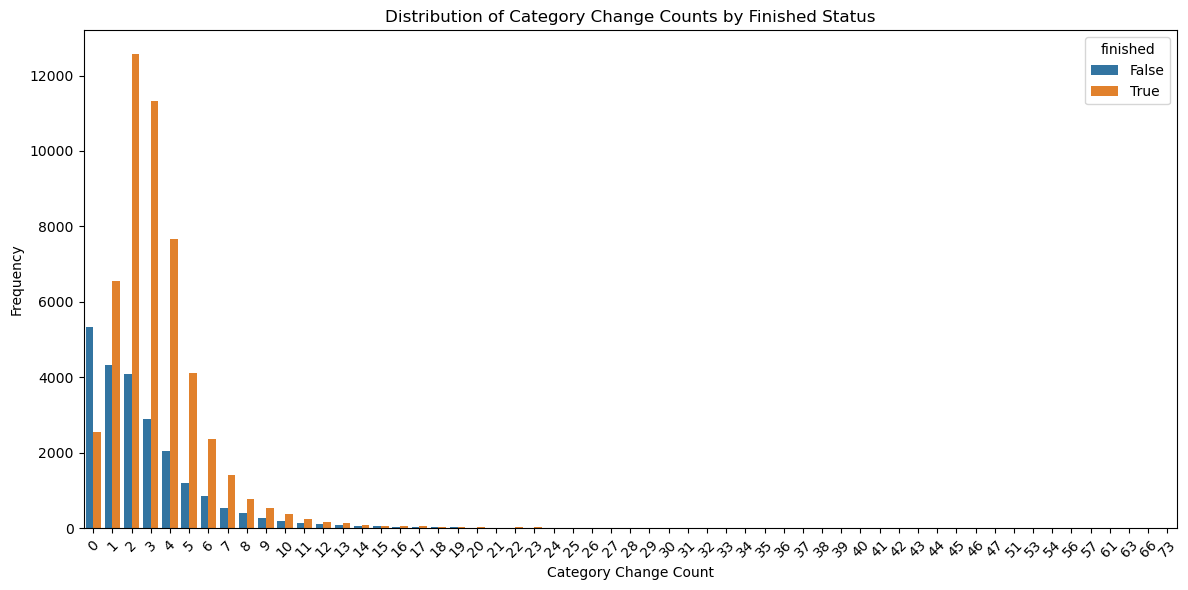

In [8]:
# Step 1: Ensure category change counts are computed
df_paths["category_change_count"] = df_paths["resolved_path_list_category"].apply(count_category_changes)

# Step 2: Aggregate the data
# Group by 'finished' and 'category_change_count' to count occurrences
agg_data = df_paths.groupby(['finished', 'category_change_count']).size().reset_index(name='count')

# Step 3: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=agg_data, x='category_change_count', y='count', hue='finished')#, palette={True: "green", False: "red"})

# Step 4: Customize the plot
plt.title("Distribution of Category Change Counts by Finished Status")
plt.xlabel("Category Change Count")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [9]:
finished_counts = df_paths[df_paths["finished"] == True]["category_change_count"]
not_finished_counts = df_paths[df_paths["finished"] == False]["category_change_count"]

t_stat, p_value = ttest_ind(finished_counts, not_finished_counts, equal_var=False)  # Use Welch's t-test

alpha = 0.05  # Significance level
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")

T-statistic: 23.506
P-value: 0.000
Reject the null hypothesis: There is a significant difference between the means of the two groups.


### Conclusion

Unexpectedly, the significant shift per link is higher in finished paths, which challenges our initial assumption that a higher shift would correlate with increased cognitive load and greater difficulty. This finding suggests that the relationship between cognitive load and task completion is more complex than anticipated. (Pepito is totally wrong).

To continue on the analysis of cognitive shifting, we will try a different more specific, semantic similarity.

# Semantic shift

Instead of looking at the shift in article category, we will try looking at the semantic shift between articles. This is calculated by taking the 1 minus the semantic similarity between two successive articles, thus giving us the semantic difference between the two articles. Large semantic shifts between articles can represent a higher cognitive load for the player, having to completely change topics from one article to the other. We will try to analyse this semantic shift along paths to see if this can have an impact on whether the path is finished or not.

We will use SentenceTransmormer, which embeds text to multidimensional vectors that can then be compared by taking the "angle" between two vectors.

In [10]:
from sentence_transformers import SentenceTransformer

# model = SentenceTransformer("all-MiniLM-L6-v2")
model = SentenceTransformer("multi-qa-mpnet-base-dot-v1") # best model for semantic similarity, but also much slower

model.similarity_fn_name = "cosine" # valid options are “cosine”, “dot”, “euclidean”, and "manhattan"

c:\Users\rapha\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


,William Shakespeare,playwright,Romeo and Juliet,17th century,love,Data analysis
William Shakespeare,1.000000,0.656702,0.681668,0.433091,0.441500,0.299462
playwright,0.656702,1.000000,0.495177,0.315922,0.314569,0.269010
Romeo and Juliet,0.681668,0.495177,1.000000,0.430731,0.521815,0.322213
17th century,0.433091,0.315922,0.430731,1.000000,0.364583,0.382337
love,0.441500,0.314569,0.521815,0.364583,1.000000,0.380129
Data analysis,0.299462,0.269010,0.322213,0.382337,0.380129,1.000000


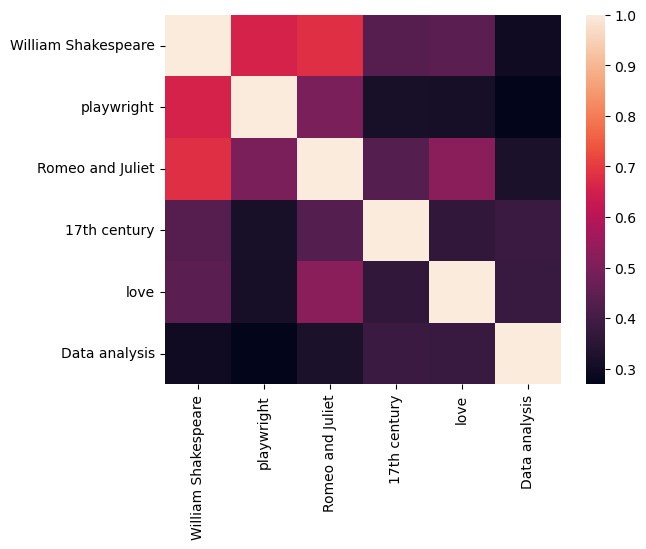

In [ ]:
examples1 = ["William Shakespeare", "playwright", "Romeo and Juliet", "17th century", "love", "Data analysis"]
embeddings1 = model.encode(examples1)

similarities = model.similarity(embeddings1, embeddings1)
similarities = pd.DataFrame(similarities)
similarities.columns = examples1
similarities.index = examples1
display(similarities)

similarities.to_csv(os.path.join(SAVE_FOLDER, "example_similarity.csv"))

sns.heatmap(similarities)
plt.show()

This is an example to show the semantic similarity at work. The results obtained are about what we would expect, William Shakespeare being semantically close to playwright and Romeo and Juliet, but having nothing to do with Data analysis. We can start to see how this could be used to analyse similarity between articles. Obviously this isn't perfect as it doesn't work for more complex relationships such as between "Romeo and Juliet" and "love" which one could expect to be closely related.

In [12]:
def clamp(n, min, max): 
    if n < min: 
        return min
    elif n > max: 
        return max
    else: 
        return n 

# if simmilarity matrix doesn't exist, make it
if not os.path.exists(os.path.join(SAVE_FOLDER, "semantic_similarity_matrix.csv")):
    # encode all articles to then perform comparison
    embeddings = model.encode(df_names["article_name"])
    num_articles = len(embeddings)
    matrix = np.zeros(shape=(num_articles, num_articles))

    for i in range (0, num_articles):
        similarities = model.similarity(np.array([embeddings[i]]), embeddings[0:(i+1)])[0]
        # populate matrix
        for j in range(0, i+1):
            # similarities should always be between 0 and 1
            similarity = clamp(similarities[j], 0, 1)
            # similarity matrix is symmetric
            matrix[i][j] = similarity
            matrix[j][i] = similarity

    matrix = pd.DataFrame(matrix, index = df_names["article_name"], columns=df_names["article_name"])
    matrix.to_csv(os.path.join(SAVE_FOLDER, "semantic_similarity_matrix.csv"))

similarity_matrix = pd.read_csv(os.path.join(SAVE_FOLDER, "semantic_similarity_matrix.csv"), sep=',', header=0, comment='#', index_col="article_name")
display(similarity_matrix)

def SemanticSimilarity(article_from, article_to):
    try:
        return similarity_matrix[article_from][article_to]
    except:
        print("Cannot find simlarity between", article_from, "and", article_to)
        return np.nan

,Áedán mac Gabráin,Åland,Édouard Manet,Éire,Óengus I of the Picts,€2 commemorative coins,10th century,11th century,12th century,13th century,...,Ziad Jarrah,Zimbabwe,Zinc,Zinc chloride,Zion National Park,Zionism,Zirconium,Zoroaster,Zuid-Gelders,Zulu
article_name,,,,,,,,,,,,,,,,,,,,,
Áedán mac Gabráin,1.000000,0.427910,0.237402,0.373486,0.300793,0.207649,0.268425,0.313857,0.250295,0.223370,...,0.398687,0.309459,0.305722,0.267938,0.286943,0.261845,0.452439,0.318833,0.374517,0.304350
Åland,0.427910,1.000000,0.377768,0.348431,0.322486,0.200049,0.301942,0.330844,0.274256,0.292470,...,0.385005,0.221507,0.293485,0.278389,0.277878,0.322565,0.292526,0.248917,0.348639,0.285108
Édouard Manet,0.237402,0.377768,1.000000,0.345499,0.381082,0.290567,0.253936,0.289308,0.321045,0.359289,...,0.412350,0.256791,0.260005,0.262387,0.292830,0.362200,0.224617,0.339343,0.311622,0.286998
Éire,0.373486,0.348431,0.345499,1.000000,0.312589,0.280968,0.262231,0.356952,0.327935,0.300746,...,0.303992,0.300092,0.282531,0.291870,0.217504,0.287560,0.323970,0.353225,0.317288,0.234413
Óengus I of the Picts,0.300793,0.322486,0.381082,0.312589,1.000000,0.264701,0.337953,0.336878,0.294056,0.318663,...,0.318713,0.265690,0.291051,0.250273,0.291052,0.293739,0.296906,0.339685,0.377326,0.234867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zionism,0.261845,0.322565,0.362200,0.287560,0.293739,0.202146,0.357604,0.275553,0.274251,0.263785,...,0.526050,0.415523,0.398721,0.374219,0.684156,1.000000,0.358565,0.460266,0.307906,0.333167
Zirconium,0.452439,0.292526,0.224617,0.323970,0.296906,0.288489,0.304370,0.265565,0.214234,0.170499,...,0.436689,0.414908,0.575800,0.556320,0.339254,0.358565,1.000000,0.533747,0.405895,0.274458
Zoroaster,0.318833,0.248917,0.339343,0.353225,0.339685,0.206020,0.378560,0.319335,0.284972,0.254555,...,0.532021,0.429986,0.484049,0.416203,0.396868,0.460266,0.533747,1.000000,0.333262,0.306034


Semantic shift (finished paths): mean = 0.5030 median = 0.5040
Semantic shift (unfinished paths): mean = 0.5171 median = 0.5179
P-value = 8.465336706748032e-97 so the semantic shift between finished and unfinished paths is statistically different


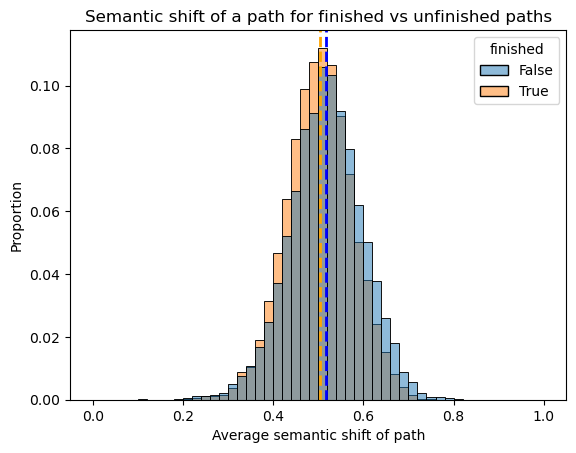

In [13]:
def CreateSemanticShiftList(row, remove_target = False):
    path_list = row.resolved_path_list_name
    if(remove_target and row["finished"]):
        path_list = path_list[:-1]
    semantic_shift_list = []

    for i in range(len(path_list) - 1):
        semantic_similarity = SemanticSimilarity(path_list[i], path_list[i+1])
        # we want the shift, how different the two articles so take 1 - similarity
        semantic_shift_list.append(1 - semantic_similarity)
    
    return semantic_shift_list

df_paths["path_semantic_shift"] = df_paths.apply(lambda row: CreateSemanticShiftList(row), axis = 1)
df_paths["average_semantic_shift"] = df_paths["path_semantic_shift"].apply(lambda path: statistics.mean(path) if len(path) > 1 else np.nan)

# get all semantic shifts in lists
mean_semantic_shift_pf = df_paths[df_paths["finished"] == True]["average_semantic_shift"]
mean_semantic_shift_pf = [x for x in mean_semantic_shift_pf if ~np.isnan(x)]

mean_semantic_shift_uf = df_paths[df_paths["finished"] == False]["average_semantic_shift"]
mean_semantic_shift_uf = [x for x in mean_semantic_shift_uf if ~np.isnan(x)]

print(f"Semantic shift (finished paths): mean = {statistics.mean(mean_semantic_shift_pf):.4f} median = {statistics.median(mean_semantic_shift_pf):.4f}")
print(f"Semantic shift (unfinished paths): mean = {statistics.mean(mean_semantic_shift_uf):.4f} median = {statistics.median(mean_semantic_shift_uf):.4f}")
pval = ttest_ind(mean_semantic_shift_pf, mean_semantic_shift_uf).pvalue
print("P-value = {} so the semantic shift between finished and unfinished paths is statistically different".format(pval))

sns.histplot(data=df_paths, x="average_semantic_shift", hue="finished", multiple="layer", binwidth=0.02, binrange=[0,1], stat="proportion", common_norm = False, alpha=0.5)
plt.title("Semantic shift of a path for finished vs unfinished paths")
plt.xlabel("Average semantic shift of path")
plt.axvline(statistics.mean(mean_semantic_shift_pf), color='orange', linestyle='dashed', linewidth=2, label='Mean Finished')
plt.axvline(statistics.mean(mean_semantic_shift_uf), color='blue', linestyle='dashed', linewidth=2, label='Mean Unfinished')
plt.show()

We can see that semantic shift along finished paths is smaller than for unfinished paths, which means finished paths tend to follow more closely related articles than unfinished paths.

## Semantic shift along a path

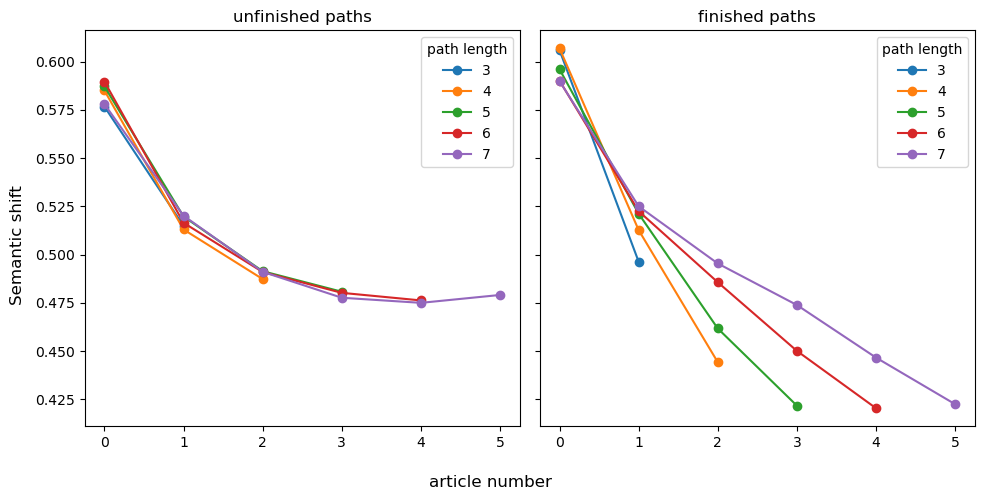

In [14]:
min_length = 3
max_length = 7

df_uf_similarity = pd.DataFrame(index = [x for x in range (min_length, max_length + 1)], columns = [x for x in range (0, max_length)])
df_pf_similarity = pd.DataFrame(index = [x for x in range (min_length, max_length + 1)], columns = [x for x in range (0, max_length)])

for length in range (min_length, max_length + 1):
    # get the semantic shift of paths of correct length
    shifts = df_paths.loc[(df_paths["finished"] == False) & (df_paths["n_click"] == length)]["path_semantic_shift"].tolist()
    # compute mean semantic shift for each article position
    shifts = np.nanmean(np.array(shifts), axis=0).tolist()
    # complete with nans to add to df
    shifts += [np.nan] * (max_length + 1 - length)
    df_uf_similarity.iloc[length - min_length] = shifts

    shifts = df_paths.loc[(df_paths["finished"] == True) & (df_paths["n_click"] == length)]["path_semantic_shift"].tolist()
    shifts = np.nanmean(np.array(shifts), axis=0).tolist()
    shifts += [np.nan] * (max_length + 1 - length)
    df_pf_similarity.iloc[length - min_length] = shifts

# display semantic shifts

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
fig.supxlabel("article number")
fig.supylabel("Semantic shift")

x = [x for x in range (max_length)]
len_path = min_length
for it, row in df_uf_similarity.iterrows():
    axs[0].plot(x, row, marker = "o", label = len_path)
    axs[0].set_title("unfinished paths")
    axs[0].legend(title="path length", loc = "upper right")
    axs[0].xaxis.set_major_locator(plt.MultipleLocator(1))
    len_path += 1

len_path = min_length
for it, row in df_pf_similarity.iterrows():
    axs[1].plot(x, row, marker = "o", label = len_path)
    axs[1].set_title("finished paths")
    axs[1].legend(title="path length", loc = "upper right")
    axs[1].xaxis.set_major_locator(plt.MultipleLocator(1))
    len_path += 1

fig.tight_layout()

We see that the semantic shift decreases at the end of finished paths compared to unfinished paths which stagnate. This is due to the fact that at the end of finished paths, the player typically refines his search to get to his target. This reflects on a smaller semantic shift towards the end as the topics are now more closely related to the target, so less shift between each successive article. This explains why the average semantic shift is lower for finisehd paths.

Semantic shift (finished paths): mean = 0.5195 median = 0.5200
Semantic shift (unfinished paths): mean = 0.5171 median = 0.5179
P-value = 0.0007363532981928333 so the semantic shift between finished and unfinished paths is statistically different


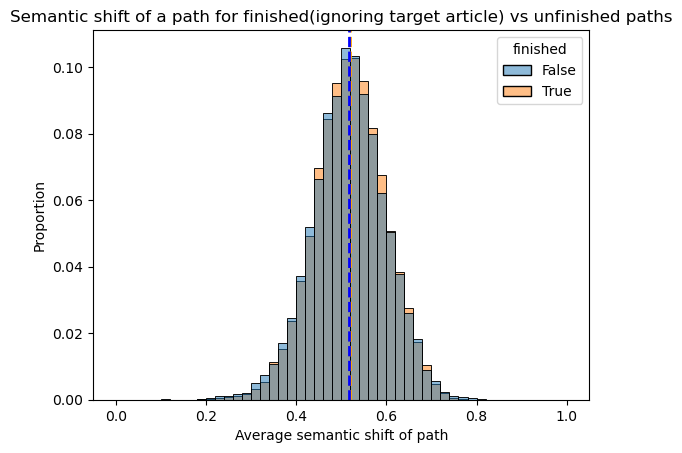

In [15]:
df_paths["path_semantic_shift_2"] = df_paths.apply(lambda row: CreateSemanticShiftList(row, True), axis = 1)
df_paths["average_semantic_shift_2"] = df_paths["path_semantic_shift_2"].apply(lambda path: statistics.mean(path) if len(path) > 1 else np.nan)

mean_semantic_shift_pf = df_paths[df_paths["finished"] == True]["average_semantic_shift_2"]
mean_semantic_shift_pf = [x for x in mean_semantic_shift_pf if ~np.isnan(x)]

mean_semantic_shift_uf = df_paths[df_paths["finished"] == False]["average_semantic_shift_2"]
mean_semantic_shift_uf = [x for x in mean_semantic_shift_uf if ~np.isnan(x)]

print(f"Semantic shift (finished paths): mean = {statistics.mean(mean_semantic_shift_pf):.4f} median = {statistics.median(mean_semantic_shift_pf):.4f}")
print(f"Semantic shift (unfinished paths): mean = {statistics.mean(mean_semantic_shift_uf):.4f} median = {statistics.median(mean_semantic_shift_uf):.4f}")
pval = ttest_ind(mean_semantic_shift_pf, mean_semantic_shift_uf).pvalue
print("P-value = {} so the semantic shift between finished and unfinished paths is statistically different".format(pval))

sns.histplot(data=df_paths, x="average_semantic_shift_2", hue="finished", multiple="layer", binwidth=0.02, binrange=[0,1], stat="proportion", common_norm = False, alpha=0.5)
plt.title("Semantic shift of a path for finished(ignoring target article) vs unfinished paths")
plt.xlabel("Average semantic shift of path")
plt.axvline(statistics.mean(mean_semantic_shift_pf), color='orange', linestyle='dashed', linewidth=2, label='Mean Finished')
plt.axvline(statistics.mean(mean_semantic_shift_uf), color='blue', linestyle='dashed', linewidth=2, label='Mean Unfinished')
plt.show()

We can see that just by removing the final semantic shift for finished paths, 

## Semantic similarity to target

In [16]:
def CreateSemanticSimilarityList(row):
    path_list = row.resolved_path_list_name
    similarity_list = []

    for article in path_list:
        similarity = SemanticSimilarity(article, row.target_link)
    
        similarity_list.append(similarity)
    
    return similarity_list

df_paths["path_similarity"] = df_paths.apply(lambda row: CreateSemanticSimilarityList(row), axis = 1)
df_paths["average_similarity"] = df_paths["path_similarity"].apply(lambda path: statistics.mean(path) if len(path) > 0 else np.nan)


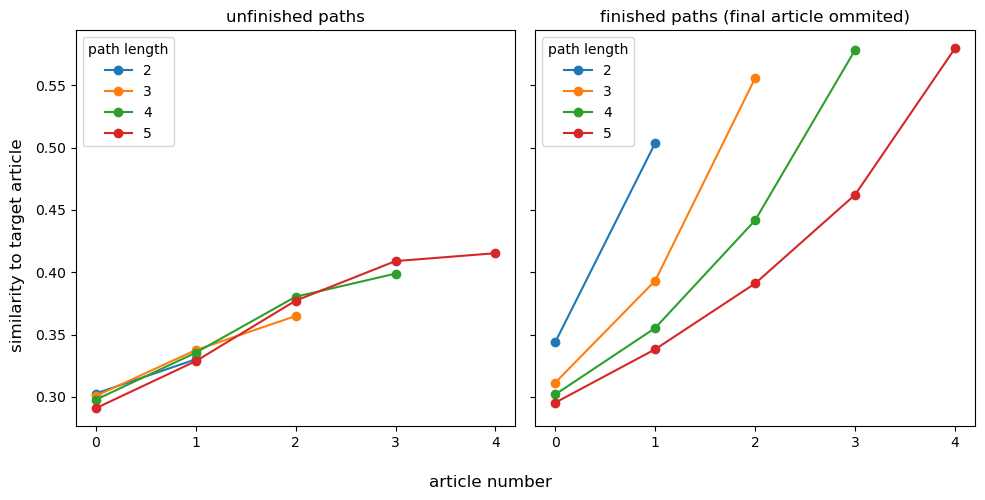

In [17]:
min_length = 2
max_length = 5

df_uf_similarity = pd.DataFrame(index = [x for x in range (min_length, max_length + 1)], columns = [x for x in range (0, max_length)])
df_pf_similarity = pd.DataFrame(index = [x for x in range (min_length, max_length + 1)], columns = [x for x in range (0, max_length)])

for length in range (min_length, max_length + 1):
    similarities = df_paths.loc[(df_paths["finished"] == False) & (df_paths["n_click"] == length)]["path_similarity"].tolist()
    similarities = np.nanmean(np.array(similarities), axis=0).tolist()
    similarities += [np.nan] * (max_length - length)
    df_uf_similarity.iloc[length - min_length] = similarities

    similarities = df_paths.loc[(df_paths["finished"] == True) & (df_paths["n_click"] == length + 1)]["path_similarity"].tolist()
    # remove last node, always max semantic similarity because reached target
    similarities = [x[:-1] for x in similarities]
    similarities = np.nanmean(np.array(similarities), axis=0).tolist()
    similarities += [np.nan] * (max_length - length)
    df_pf_similarity.iloc[length - min_length] = similarities


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
fig.supxlabel("article number")
fig.supylabel("similarity to target article")

x = [x for x in range (max_length)]
len_path = min_length
for it, row in df_uf_similarity.iterrows():
    axs[0].plot(x, row, marker = "o", label = len_path)
    axs[0].set_title("unfinished paths")
    axs[0].legend(title="path length", loc = "upper left")
    axs[0].xaxis.set_major_locator(plt.MultipleLocator(1))
    len_path += 1

len_path = min_length
for it, row in df_pf_similarity.iterrows():
    axs[1].plot(x, row, marker = "o", label = len_path)
    axs[1].set_title("finished paths (final article ommited)")
    axs[1].legend(title="path length", loc = "upper left")
    axs[1].xaxis.set_major_locator(plt.MultipleLocator(1))
    len_path += 1

fig.tight_layout()

This links back to our observation earlier, unfinished paths stagnating after a few articles not being able to get the final push to reach the target.

In [18]:
df_paths.to_csv(os.path.join(SAVE_FOLDER, "paths_cognitive_shift.csv"), index = False)